## Download model from tensorflow models github

In [0]:
!pip install tensorflow-gpu==1.13.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 345.2MB 49kB/s 
     |████████████████████████████████| 368kB 41.4MB/s 
     |████████████████████████████████| 3.2MB 32.1MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [0]:
#!git clone https://github.com/tensorflow/models.git
!git clone -b r1.13.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 34385, done.
remote: Total 34385 (delta 0), reused 0 (delta 0), pack-reused 34385
Receiving objects: 100% (34385/34385), 512.44 MiB | 29.61 MiB/s, done.
Resolving deltas: 100% (22183/22183), done.
Checking out files: 100% (2768/2768), done.


## Download model from detection model zoo
visit https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md

In [0]:
!wget --no-check-certificate \
    http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz \
    -O models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2020-05-04 07:45:48--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.184.128, 2a00:1450:400c:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.184.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

models/research/obj 100%[===================>] 142.21M   111MB/s    in 1.3s    

2020-05-04 07:45:50 (111 MB/s) - ‘models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [0]:
!tar xvzf models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz -C models/research/object_detection/

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


## Download another github files

In [0]:
!git clone https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10.git

Cloning into 'TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10'...
remote: Enumerating objects: 1141, done.
remote: Total 1141 (delta 0), reused 0 (delta 0), pack-reused 1141
Receiving objects: 100% (1141/1141), 57.63 MiB | 27.44 MiB/s, done.
Resolving deltas: 100% (573/573), done.


In [0]:
!mv TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/* models/research/object_detection/
!mv models/research/slim/* models/research/object_detection/

In [0]:
#remove all the trained files if you want to train your own application
#!rm models/research/object_detection/training/*
!rm models/research/object_detection/inference_graph/*
!rm models/research/object_detection/images/*.csv

In [0]:
%cd models/research/
%pwd
#should be in '/content/models/research'

/content/models/research


'/content/models/research'

In [0]:
!protoc --python_out=. ./object_detection/protos/anchor_generator.proto ./object_detection/protos/argmax_matcher.proto ./object_detection/protos/bipartite_matcher.proto ./object_detection/protos/box_coder.proto ./object_detection/protos/box_predictor.proto ./object_detection/protos/eval.proto ./object_detection/protos/faster_rcnn.proto ./object_detection/protos/faster_rcnn_box_coder.proto ./object_detection/protos/grid_anchor_generator.proto ./object_detection/protos/hyperparams.proto ./object_detection/protos/image_resizer.proto ./object_detection/protos/input_reader.proto ./object_detection/protos/losses.proto ./object_detection/protos/matcher.proto ./object_detection/protos/mean_stddev_box_coder.proto ./object_detection/protos/model.proto ./object_detection/protos/optimizer.proto ./object_detection/protos/pipeline.proto ./object_detection/protos/post_processing.proto ./object_detection/protos/preprocessor.proto ./object_detection/protos/region_similarity_calculator.proto ./object_detection/protos/square_box_coder.proto ./object_detection/protos/ssd.proto ./object_detection/protos/ssd_anchor_generator.proto ./object_detection/protos/string_int_label_map.proto ./object_detection/protos/train.proto ./object_detection/protos/keypoint_box_coder.proto ./object_detection/protos/multiscale_anchor_generator.proto ./object_detection/protos/graph_rewriter.proto

In [0]:
!python setup.py build

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/sizeChecker.py -> build/lib/object_detection
copying object_detection/Object_detection_video.py -> build/lib/object_detection
copying object_detection/model_lib_test.py -> build/lib/object_detection
copying object_detection/model_lib.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/i

In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/sizeChecker.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/hyperparams_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/string_int_label_map.proto -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/li

In [0]:
#import utils
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## After uploading images and xml

In [0]:
#upload the images first, then
%cd object_detection/
%pwd
#should be in '/content/models/research/object_detection'

/content/models/research/object_detection


'/content/models/research/object_detection'

In [0]:
#generate csv files in images folder
!python xml_to_csv.py

Successfully converted xml to csv.
Successfully converted xml to csv.


#### Edit generate_tfrecord.py
replace the label map with yours

In [0]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

##Make labelmap and config file

####Make labelmap
1. Copy pet_label_map.pbtxt from "data" folder to "training" folder.
2. Replace items with yours.
3. Rename the file as labelmap.pbtxt

In [0]:
#make labelmap.pbtxt and save it in training folder

####Make config file
1. Copy faster_rcnn_inception_v2_pets.config from "samples/configs/" folder to "training" folder.
2. Set the num_classes to your classes amount. (ex: num_classes: 6)
3. Set fine_tune_checkpoint: "/content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"
4. Set input_path: "/content/models/research/object_detection/train.record"
5. Set label_map_path: "/content/models/research/object_detection/training/labelmap.pbtxt"
6. Set the num_examples to your test image amount. (ex: num_examples: 67)
7. Set input_path: "/content/models/research/object_detection/test.record"
8. Set label_map_path: "/content/models/research/object_detection/training/labelmap.pbtxt"

In [0]:
#copy faster_rcnn_inception_v2_pets.config, edit and save it in training folder

##Train the model

In [0]:
!mv legacy/train.py .

In [0]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config
#train until the loss is constantly lower than 0.05, then stop the training

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Export the model

In [0]:
#"XXXX" in "model.ckpt-XXXX" should be replaced with the highest-numbered .ckpt file in the training folder
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix training/model.ckpt-XXXX --output_directory inference_graph

##Download trained model

In [0]:
#rename the downloaded file if the file name is not correct (inference_graph.zip)
!wget --no-check-certificate \
    https://storage.googleapis.com/ai_data_colab2/inference_graph.zip \
    -O inference_graph/inference_graph.zip

--2020-05-04 07:59:18--  https://storage.googleapis.com/ai_data_colab/inference_graph.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144131470 (137M) [application/zip]
Saving to: ‘inference_graph/inference_graph.zip’

inference_graph/inf 100%[===================>] 137.45M  13.2MB/s    in 10s     

2020-05-04 07:59:31 (13.2 MB/s) - ‘inference_graph/inference_graph.zip’ saved [144131470/144131470]



In [0]:
import zipfile
local_zip = 'inference_graph/inference_graph.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('inference_graph/')
zip_ref.close()

##Test the model

In [0]:
%pwd
#should be in '/content/models/research/object_detection'

'/content/models/research/object_detection'

In [0]:
# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
from google.colab.patches import cv2_imshow

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test1.JPG'  #note the image name 'test1.JPG' extension is .JPG

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 6

print(PATH_TO_CKPT)
print(PATH_TO_LABELS)
print(PATH_TO_IMAGE)

/content/models/research/object_detection/inference_graph/frozen_inference_graph.pb
/content/models/research/object_detection/training/labelmap.pbtxt
/content/models/research/object_detection/test1.JPG


In [0]:
# Load the label map.
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')


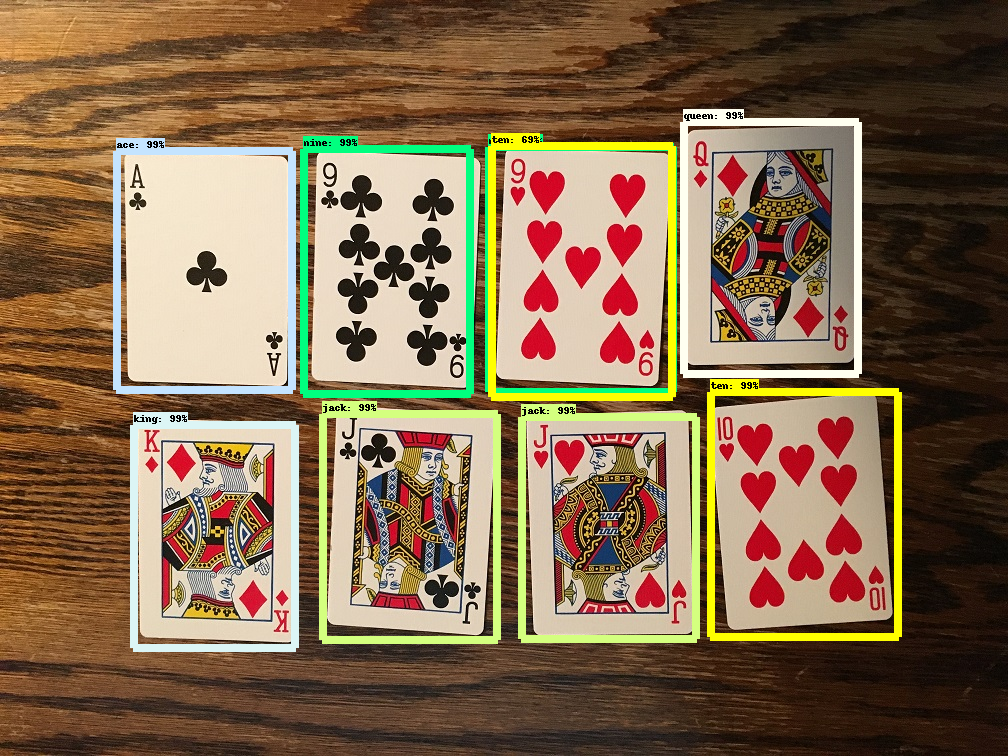

In [0]:
# Load image using OpenCV and expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')
vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
cv2_imshow(image)

Reference: https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10